In [1]:
import os
import sys
sys.path.append('/nfs/z1/userhome/ChenXiaYu/workingdir/code/MagicBox')
import decimal
import numpy as np
import pandas as pd
import pickle as pkl
import nibabel as nib
from os.path import join as pjoin
from decimal import Decimal
from scipy.stats import sem, pearsonr, spearmanr, permutation_test
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from magicbox.io.io import CiftiReader
from magicbox.stats.outlier import outlier_iqr
from magicbox.vis.plot import plot_polyfit, TickRefinery
from cxy_visual_dev.lib.predefine import proj_dir, Atlas,\
    LR_count_32k, s1200_avg_eccentricity, mmp_map_file,\
    get_rois, s1200_avg_myelin, s1200_avg_thickness,\
    s1200_avg_RFsize, s1200_avg_R2, hemi2Hemi, hemi2stru,\
    meas2color, beh_name2abbr

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/scatter')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# AHEAD

## 单个模态

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


---C1---
polynomial:
  
0.165 x - 299.5

score: PearsonRResult(statistic=0.4516808558737564, pvalue=0.0)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.4516808558737564, pvalue=0.0)
---C2---
polynomial:
  
0.01958 x - 35.54

score: PearsonRResult(statistic=0.14243501602456796, pvalue=2.2564098779636488e-32)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.1424350160245679, pvalue=2.2564098779626228e-32)


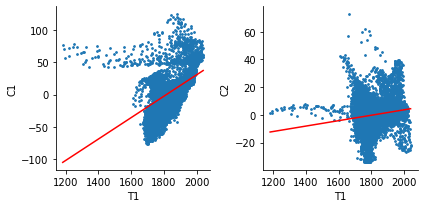

In [3]:
figsize = (6, 3)
Hemi = 'L'
vis_name = f'MMP-vis3-{Hemi}'
modality = 't1map'
mod2name = {'t1map': 'T1'}

atlas = Atlas('HCP-MMP')
mod_file = pjoin(anal_dir, f'AHEAD/AHEAD-YA_{modality}.dscalar.nii')
pc_names = ('C1', 'C2')
n_pc = len(pc_names)
pc_file = pjoin(anal_dir, 'decomposition/'
                f'HCPY-M+corrT_{vis_name}_zscore1_PCA-subj.dscalar.nii')
out_file = pjoin(work_dir, f'{mod2name[modality]}-corr-PC_{Hemi}.jpg')
# out_file = 'show'

mask = atlas.get_mask(get_rois(vis_name))[0]
mod_map = nib.load(mod_file).get_fdata()[0, mask]
pc_maps = nib.load(pc_file).get_fdata()[:n_pc, mask]

fig, axes = plt.subplots(1, n_pc, figsize=figsize)
x = mod_map
for pc_idx, pc_name in enumerate(pc_names):
    print(f'---{pc_name}---')
    ax = axes[pc_idx]
    y = pc_maps[pc_idx]
    plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
    print("pearsonr(x, y, alternative='two-sided'):\n",
          pearsonr(x, y, alternative='two-sided'))
    # xlim = ax.get_xlim()
    # ylim = ax.get_ylim()
    # xlim_left = round_decimal(xlim[0], 3, 'floor')
    # ylim_bottom = round_decimal(ylim[0], 3, 'floor')
    # xlim_right = round_decimal(xlim[1], 3, 'ceil')
    # ylim_top = round_decimal(ylim[1], 3, 'ceil')
    # xlim = (xlim_left, xlim_right)
    # ylim = (ylim_bottom, ylim_top)
    # ax.set_xlim(*xlim)
    # ax.set_xticks(xlim)
    # ax.set_xticklabels(xlim)
    # ax.set_ylim(*ylim)
    # ax.set_yticks(ylim)
    # ax.set_yticklabels(ylim)
    ax.set_xlabel(mod2name[modality])
    ax.set_ylabel(pc_name)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

## 三个模态

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


---t1map corr C1---
polynomial:
  
0.2843 x - 515.4

score: PearsonRResult(statistic=0.6586629468982295, pvalue=0.0)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.6586629468982296, pvalue=0.0)

---t1map corr C2---
polynomial:
  
0.02594 x - 47.02

score: PearsonRResult(statistic=0.13814374698568116, pvalue=4.1938939272512316e-30)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.1381437469856812, pvalue=4.1938939272512316e-30)

---r2starmap corr C1---
polynomial:
  
-350.2 x + 12.15

score: PearsonRResult(statistic=0.056447089173220936, pvalue=3.494036849589465e-06)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=-0.05644708917322095, pvalue=3.494036849589465e-06)

---r2starmap corr C2---
polynomial:
  
154.8 x - 5.372

score: PearsonRResult(statistic=0.057372848761436855, pvalue=2.4097099632030234e-06)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.057372848761436855, pvalue=2.4097099632030234e-06)

---

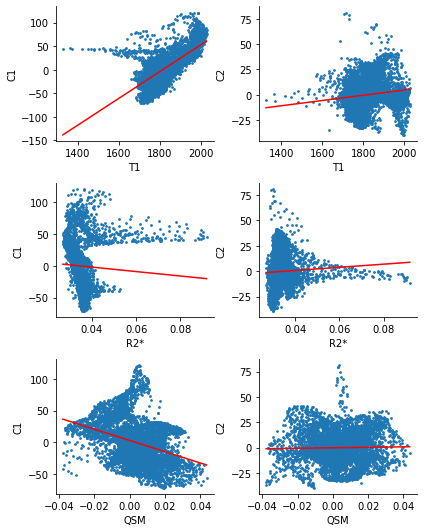

In [5]:
figsize = (6, 7.5)
Hemi = 'R'
vis_name = f'MMP-vis3-{Hemi}'
modalities = ['t1map', 'r2starmap', 'qsm']
mod2name = {'t1map': 'T1', 'r2starmap': 'R2*', 'qsm': 'QSM'}
pc_names = ('C1', 'C2')

n_mod = len(modalities)
n_pc = len(pc_names)
atlas = Atlas('HCP-MMP')

mod_file = pjoin(anal_dir, 'AHEAD/AHEAD-YA_{mod}.dscalar.nii')
pc_file = pjoin(anal_dir, 'decomposition/'
                f'HCPY-M+corrT_{vis_name}_zscore1_PCA-subj.dscalar.nii')
mods_name = '+'.join([mod2name[i] for i in modalities])
out_file = pjoin(work_dir, f'{mods_name}-corr-PC_{Hemi}.jpg')
# out_file = 'show'

mask = atlas.get_mask(get_rois(vis_name))[0]
pc_maps = nib.load(pc_file).get_fdata()[:n_pc, mask]

fig, axes = plt.subplots(n_mod, n_pc, figsize=figsize)
for mod_idx, mod in enumerate(modalities):
    mod_map = nib.load(mod_file.format(
        mod=mod)).get_fdata()[0, mask]
    x = mod_map
    for pc_idx, pc_name in enumerate(pc_names):
        print(f'---{mod} corr {pc_name}---')
        ax = axes[mod_idx, pc_idx]
        y = pc_maps[pc_idx]
        plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
        print("pearsonr(x, y, alternative='two-sided'):\n",
            pearsonr(x, y, alternative='two-sided'))
        print()
        ax.set_xlabel(mod2name[mod])
        ax.set_ylabel(pc_name)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# BigBrain

---C1---
polynomial:
  
1 x + 3.739e-07

score: PearsonRResult(statistic=0.72454994490917, pvalue=0.0)
pearsonr(x, y, alternative='greater'):
 PearsonRResult(statistic=0.7245499448080261, pvalue=0.0)
---C2---
polynomial:
  
1 x + 8.041e-09

score: PearsonRResult(statistic=0.2622945954709146, pvalue=1.4710056695266194e-106)
pearsonr(x, y, alternative='greater'):
 PearsonRResult(statistic=0.2622945956765703, pvalue=7.355025468112611e-107)


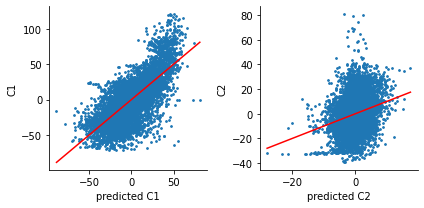

In [2]:
figsize = (6, 3)
Hemi = 'R'
fname = f'Msp1~6_fit-ordinary_PC12_{Hemi}'
fpath = pjoin(anal_dir, f'bigbrain/to_32fsLR/{fname}.pkl')
pc_names = ('C1', 'C2')
n_pc = len(pc_names)
pc_file = pjoin(anal_dir, 'decomposition/'
                f'HCPY-M+corrT_MMP-vis3-{Hemi}_zscore1_PCA-subj_nan.func.gii')
out_file = pjoin(work_dir, f'{fname}.jpg')
# out_file = 'show'

data = pkl.load(open(fpath, 'rb'))
assert pc_names == data['PC name']
pc_maps_pred = data['Y_pred'].T

pc_gii = nib.load(pc_file)
non_nan_vec = None
pc_maps = []
for pc_idx in range(2):
    pc_map = pc_gii.darrays[pc_idx].data
    if non_nan_vec is None:
        non_nan_vec = ~np.isnan(pc_map)
    else:
        assert np.all(non_nan_vec == ~np.isnan(pc_map))
    pc_maps.append(pc_map[non_nan_vec])
pc_maps = np.array(pc_maps)

# plot
fig, axes = plt.subplots(1, n_pc, figsize=figsize)
for pc_idx, pc_name in enumerate(pc_names):
    print(f'---{pc_name}---')
    ax = axes[pc_idx]
    x = pc_maps_pred[pc_idx]
    y = pc_maps[pc_idx]
    plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
    print("pearsonr(x, y, alternative='greater'):\n",
          pearsonr(x, y, alternative='greater'))
    # xlim = ax.get_xlim()
    # ylim = ax.get_ylim()
    # xlim_left = round_decimal(xlim[0], 3, 'floor')
    # ylim_bottom = round_decimal(ylim[0], 3, 'floor')
    # xlim_right = round_decimal(xlim[1], 3, 'ceil')
    # ylim_top = round_decimal(ylim[1], 3, 'ceil')
    # xlim = (xlim_left, xlim_right)
    # ylim = (ylim_bottom, ylim_top)
    # ax.set_xlim(*xlim)
    # ax.set_xticks(xlim)
    # ax.set_xticklabels(xlim)
    # ax.set_ylim(*ylim)
    # ax.set_yticks(ylim)
    # ax.set_yticklabels(ylim)
    ax.set_xlabel(f'predicted {pc_name}')
    ax.set_ylabel(pc_name)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# SC pattern similarity predict gradient distance

===hemi-pearson corr 2D-PC-zscore===
polynomial:
  
-0.6913 x + 1.469

score: PearsonRResult(statistic=0.15036927462332375, pvalue=3.396717128763988e-06)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=-0.15036927462332378, pvalue=3.396717128763994e-06)
===end===

===hemi-pearson corr PC1===
polynomial:
  
0.009234 x + 25.32

score: PearsonRResult(statistic=7.408994828233566e-05, pvalue=0.9981841918476265)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=7.408994828803414e-05, pvalue=0.9981841918474931)
===end===

===hemi-pearson corr PC2===
polynomial:
  
-11.52 x + 15.12

score: PearsonRResult(statistic=0.17497664499748686, pvalue=6.077698699877245e-08)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=-0.17497664499748689, pvalue=6.077698699877245e-08)
===end===

===hemi-pearson corr 2D-PC===
polynomial:
  
-7.799 x + 32.52

score: PearsonRResult(statistic=0.06751492538504922, pvalue=0.03787657027012273)
pearsonr(x, y, alternativ

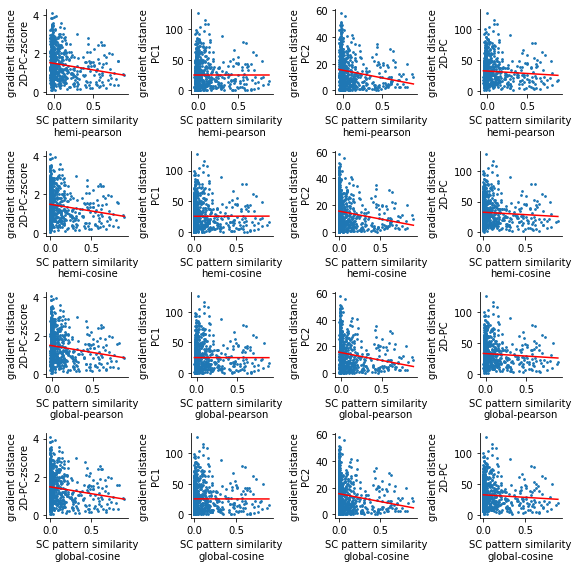

In [2]:
Hemi = 'R'
figsize = (8, 8)
pattern_types = ['hemi', 'global']
similar_types = ['pearson', 'cosine']
ps_types = []
for p in pattern_types:
    for s in similar_types:
        ps_types.append(f'{p}-{s}')
n_ps = len(ps_types)
sc_file = pjoin(anal_dir, 'stru_conn/SC-pattern_{ps_type}_{Hemi}.pkl')

grad_types = ['2D-PC-zscore', 'PC1', 'PC2', '2D-PC']
n_grad = len(grad_types)
grad_file = pjoin(anal_dir, f'paper_fig/gradient_distance_roi_{Hemi}.pkl')

out_file = pjoin(work_dir, 'SC-corr-grad.svg')
# out_file = 'show'

# plot
grad_data = pkl.load(open(grad_file, 'rb'))
fig, axes = plt.subplots(n_ps, n_grad, figsize=figsize)
for ps_idx, ps_type in enumerate(ps_types):
    sc_data = pkl.load(open(sc_file.format(ps_type=ps_type, Hemi=Hemi), 'rb'))
    assert sc_data['roi_pair'] == grad_data['roi_pair']
    x = sc_data['vec']
    for grad_idx, grad_type in enumerate(grad_types):
        print(f'==={ps_type} corr {grad_type}===')
        y = grad_data[grad_type]
        ax = axes[ps_idx, grad_idx]
        plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
        print("pearsonr(x, y, alternative='two-sided'):\n",
              pearsonr(x, y, alternative='two-sided'))
        print('===end===\n')
        ax.set_xlabel(f'SC pattern similarity\n{ps_type}')
        ax.set_ylabel(f'gradient distance\n{grad_type}')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# Plot decomposition

## 可视化PCA各成分的解释方差

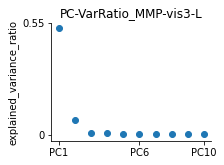

In [6]:
# settings
figsize = (3.2, 2.4)
Hemi = 'L'
vis_name = f'MMP-vis3-{Hemi}'
n_pc = 10
pca_file = pjoin(anal_dir, 'decomposition/'
                 f'HCPY-M+corrT_{vis_name}_zscore1_PCA-subj.pkl')
out_name = f'PC-VarRatio_{vis_name}'
out_file = pjoin(work_dir, f'{out_name}.svg')
# out_file = 'show'

# load
pca = pkl.load(open(pca_file, 'rb'))
x = np.arange(n_pc)
y = pca.explained_variance_ratio_[:n_pc]

# plot
xticks = [x[0], x[int(n_pc / 2)], x[-1]]
xticklabels = [f'PC{i+1}' for i in xticks]
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.scatter(x, y)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ylim = ax.get_ylim()
ctx = decimal.getcontext()
ctx.rounding = decimal.ROUND_FLOOR
ylim_bottom = round(Decimal(str(ylim[0])), 2)
ctx.rounding = decimal.ROUND_CEILING
ylim_top = round(Decimal(str(ylim[1])), 2)
ylim = (ylim_bottom, ylim_top)
yticks = (0, ylim_top)
ax.set_ylim(*ylim)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_ylabel('explained_variance_ratio')
ax.set_title(out_name)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

## myelin和thickness权重之间的相关

---C1---
polynomial:
  
0.04761 x + 0.02014

score: PearsonRResult(statistic=0.03268387089042909, pvalue=0.2977366556594054)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.03268387089042926, pvalue=0.29773665565938634)
---C2---
polynomial:
  
-0.1198 x + 0.02608

score: PearsonRResult(statistic=0.05964974351951696, pvalue=0.05401090679110942)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=-0.0596497435195171, pvalue=0.05401090679110932)


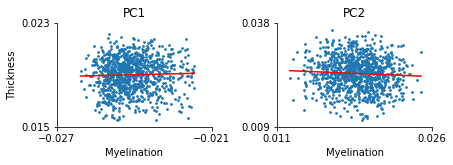

In [2]:
# settings
iqr_coef = 1.5
figsize = (6.4, 2.4)
Hemi = 'L'
vis_name = f'MMP-vis3-{Hemi}'
pc_names = ['C1', 'C2']
m_file = pjoin(anal_dir, 'decomposition/'
               f'HCPY-M+corrT_{vis_name}_zscore1_PCA-subj_M.csv')
t_file = pjoin(anal_dir, 'decomposition/'
               f'HCPY-M+corrT_{vis_name}_zscore1_PCA-subj_corrT.csv')
out_name = f'weights_M-corr-T_{iqr_coef}IQR_{Hemi}'
out_file = pjoin(work_dir, f'{out_name}.svg')
out_file = 'show'

def statistic(x, y):
    return pearsonr(x, y)[0]

# load
n_pc = len(pc_names)
df_m = pd.read_csv(m_file)
df_t = pd.read_csv(t_file)

# plot
fig, axes = plt.subplots(1, n_pc, figsize=figsize)
for pc_idx, pc_name in enumerate(pc_names):
    print(f'---{pc_name}---')
    ax = axes[pc_idx]
    x = df_m[pc_name].values
    y = df_t[pc_name].values
    if iqr_coef is not None:
        outlier_mask1 = outlier_iqr(x, iqr_coef)
        outlier_mask2 = outlier_iqr(y, iqr_coef)
        outlier_mask = np.logical_or(outlier_mask1, outlier_mask2)
        mask = ~outlier_mask
        x = x[mask]
        y = y[mask]
    plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
    # pmt_test = permutation_test(
    #     (x, y), statistic, permutation_type='pairings',
    #     vectorized=False, n_resamples=10000, alternative='two-sided',
    #     random_state=7)
    # print('pmt_test.statistic:\n', pmt_test.statistic)
    # print('pmt_test.pvalue:\n', pmt_test.pvalue)
    print("pearsonr(x, y, alternative='two-sided'):\n",
          pearsonr(x, y, alternative='two-sided'))
    tr = TickRefinery(ax)
    tr.set_xticks_as_limit(n_tick=2, ndigits=3)
    tr.set_yticks_as_limit(n_tick=2, ndigits=3)
    ax.set_xlabel('Myelination')
    if pc_idx == 0:
        ax.set_ylabel('Thickness')
    ax.set_title(f'P{pc_name}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# 结构PC1/2与其它指标在ROI级别上的相关

## stru-C1/2与查阅文献得到的脑区层级的关系


---mean_PC1---
polynomial:
  
12.4 x - 62.19

score: PearsonRResult(statistic=0.9725421451596922, pvalue=2.405815171999379e-06)
pmt_test.statistic:
 0.9999999999999999
pmt_test.pvalue:
 0.00019998000199980003
spearmanr(x, y, alternative='two-sided'):
 SignificanceResult(statistic=0.9999999999999999, pvalue=6.646897422032013e-64)

---mean_PC2---
polynomial:
  
1.362 x + 0.478

score: PearsonRResult(statistic=0.38047878118134104, pvalue=0.2780848610606114)
pmt_test.statistic:
 0.43030303030303024
pmt_test.pvalue:
 0.20717928207179281
spearmanr(x, y, alternative='two-sided'):
 SignificanceResult(statistic=0.43030303030303024, pvalue=0.21449233253280775)


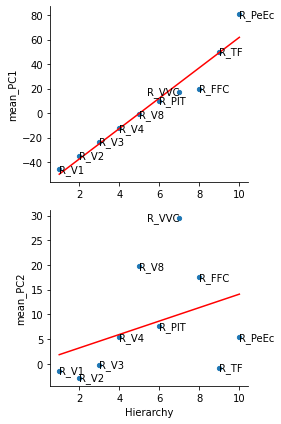

In [3]:
Hemi = 'R'
path_name = 'Hierarchy3'  # Hierarchy4和Hierarchy5只支持右脑
figsize = (4, 6)
pc_names = ['PC1', 'PC2']
metrics = ['mean']
rois = [f'{Hemi}_{i}' for i in get_rois(path_name)]
fpath = pjoin(anal_dir, f'ROI_scalar/ROI_scalar1_MMP-vis3-{Hemi}.csv')
out_file = pjoin(work_dir, f'PC12-corr-{path_name}_{Hemi}.jpg')
out_file = 'show'

def statistic(x, y):
    return spearmanr(x, y)[0]

n_pc = len(pc_names)
n_metric = len(metrics)
df = pd.read_csv(fpath, index_col=0)

if path_name == 'Hierarchy4':
    roi2label = {
        'R_FFA1': 'R_pFus-faces',
        'R_FFA2': 'R_mFus-faces'}
    label2key = {
        'R_pFus-faces': 1,
        'R_mFus-faces': 2}
    pc_maps = nib.load(pjoin(
        anal_dir, 'decomposition/HCPY-M+corrT_MMP-vis3-R_zscore1_PCA-subj.dscalar.nii'
    )).get_fdata()[:2]
    split_map = nib.load(pjoin(
        proj_dir, 'data/HCP-YA_FFA-split.32k_fs_LR.dlabel.nii'
    )).get_fdata()[0]
    for roi, lbl in roi2label.items():
        mask = split_map == label2key[lbl]
        for pc_idx, pc_name in enumerate(pc_names):
            idx = f'mean_{pc_name}'
            df.loc[idx, roi] = np.mean(pc_maps[pc_idx][mask])
elif path_name == 'Hierarchy5':
    roi2label = {
        'R_pFFA': 'R_pFus-faces',
        'R_mFFA': 'R_mFus-faces'}
    label2key = {
        'R_pFus-faces': 1,
        'R_mFus-faces': 2}
    pc_maps = nib.load(pjoin(
        anal_dir, 'decomposition/HCPY-M+corrT_MMP-vis3-R_zscore1_PCA-subj.dscalar.nii'
    )).get_fdata()[:2]
    mpm_map = nib.load(pjoin(
        proj_dir, 'data/HCP-YA_FFA-MPM_thr-25.32k_fs_LR.dlabel.nii'
    )).get_fdata()[0]
    for roi, lbl in roi2label.items():
        mask = mpm_map == label2key[lbl]
        for pc_idx, pc_name in enumerate(pc_names):
            idx = f'mean_{pc_name}'
            # MPM会有部分超出当前定义的视觉皮层
            df.loc[idx, roi] = np.nanmean(pc_maps[pc_idx][mask])

fig, axes = plt.subplots(n_pc, n_metric, figsize=figsize)
x = np.arange(1, len(rois)+1)
xlabel = 'Hierarchy'
for pc_idx, pc_name in enumerate(pc_names):
    for metric_idx, metric in enumerate(metrics):
        # ax = axes[pc_idx, metric_idx]
        ax = axes[pc_idx]
        idx = f'{metric}_{pc_name}'
        y = df.loc[idx, rois].values
        print(f'\n---{idx}---')
        plot_polyfit(x, y, 1, color='r', s=18, ax=ax)
        pmt_test = permutation_test(
            (x, y), statistic, permutation_type='pairings',
            vectorized=False, n_resamples=10000, alternative='two-sided',
            random_state=7)
        print('pmt_test.statistic:\n', pmt_test.statistic)
        print('pmt_test.pvalue:\n', pmt_test.pvalue)
        print("spearmanr(x, y, alternative='two-sided'):\n",
              spearmanr(x, y, alternative='two-sided'))
        if pc_idx == (n_pc - 1):
            ax.set_xlabel(xlabel)
        ax.set_ylabel(idx)
        for j, i, roi in zip(x, y, rois):
            if roi.endswith('VVC'):
                ha, va = 'right', 'center'
            else:
                ha, va = 'left', 'center'
            ax.text(j, i, roi, horizontalalignment=ha, verticalalignment=va)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

## 以RFsize的均值为x轴（作为功能层级的代表），PC1/2为y轴。PC1/2可以是均值，标准差，变异系数。

#ROI: 24
ROIs: ['L_V1v', 'L_V1d', 'L_V2v', 'L_V2d', 'L_V3v', 'L_V3d', 'L_hV4', 'L_VO1', 'L_VO2', 'L_PHC1', 'L_PHC2', 'L_TO2', 'L_TO1', 'L_LO2', 'L_LO1', 'L_V3B', 'L_V3A', 'L_IPS0', 'L_IPS1', 'L_IPS2', 'L_IPS3', 'L_IPS4', 'L_IPS5', 'L_SPL1']

---mean_PC1---
polynomial:
  
-2.932 x - 0.6116

score: (0.2905612561363651, 0.16838980063132566)
spearmanr: SpearmanrResult(correlation=-0.23739130434782607, pvalue=0.26401496121383244)
pearsonr: (-0.2905612561363651, 0.16838980063132566)

---std_PC1---
polynomial:
  
0.3433 x + 5.503

score: (0.24267952396590806, 0.25320552791993506)
spearmanr: SpearmanrResult(correlation=0.3052173913043478, pvalue=0.14697401734454302)
pearsonr: (0.24267952396590828, 0.2532055279199347)

---cv_PC1---
polynomial:
  
-0.04874 x + 0.7692

score: (0.23027473392383335, 0.2790217468777067)
spearmanr: SpearmanrResult(correlation=-0.35478260869565215, pvalue=0.08891743107314608)
pearsonr: (-0.23027473392383307, 0.2790217468777073)

---mean_PC2---
polynomial:
  
3.028 x -

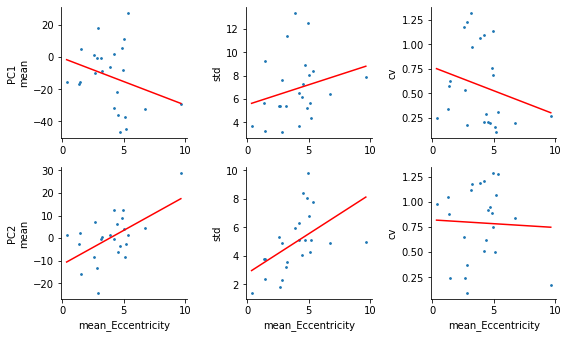

In [3]:
Hemi = 'L'

# rois = 'all'
# R2_limit = False
# fpath = pjoin(anal_dir, f'ROI_scalar/ROI_scalar1_MMP-vis3-{Hemi}.csv')

rois = get_rois(f'Wang2015-{Hemi}')
if Hemi == 'L':
    # L_FEF与MMP-vis3-L没有重合的部分，前者在额叶.
    # L_IPS5有10个顶点，与MMP-vis3-L重合的有8个
    # L_TO2只有2个顶点，但都与MMP-vis3-L重合
    rois.remove(f'{Hemi}_FEF')
elif Hemi == 'R':
    # R_FEF和R_IPS5与MMP-vis3-R没有重合的部分，前者在额叶，后者本身只有3个顶点。
    rois.remove(f'{Hemi}_FEF')
    rois.remove(f'{Hemi}_IPS5')
else:
    raise ValueError
R2_limit = False  # 只能是False
fpath = pjoin(anal_dir, f'ROI_scalar/ROI_scalar1_Wang2015-{Hemi}.csv')

figsize = (8, 4.8)
xlabel = 'mean_Eccentricity'  # mean_RFsize, mean_Eccentricity
pc_names = ['PC1', 'PC2']
metrics = ['mean', 'std', 'cv']
out_file = pjoin(work_dir, f'ROI_scalar1_{Hemi}.jpg')
# out_file = 'show'

n_pc = len(pc_names)
n_metric = len(metrics)
df = pd.read_csv(fpath, index_col=0)
if rois == 'all':
    rois = df.columns

if R2_limit:
    # 只保留跨顶点的平均R2大于9.8的脑区
    atlas = Atlas('HCP-MMP')
    R2_map = nib.load(s1200_avg_R2).get_fdata()[0, :LR_count_32k]
    rois_tmp = []
    for roi in rois:
        mask = atlas.get_mask(roi)[0]
        if np.mean(R2_map[mask]) > 9.8:
            rois_tmp.append(roi)
    rois = rois_tmp
print('#ROI:', len(rois))
print('ROIs:', rois)

fig, axes = plt.subplots(n_pc, n_metric, figsize=figsize)
x = df.loc[xlabel, rois].values
for pc_idx, pc_name in enumerate(pc_names):
    for metric_idx, metric in enumerate(metrics):
        ax = axes[pc_idx, metric_idx]
        idx = f'{metric}_{pc_name}'
        y = df.loc[idx, rois].values
        print(f'\n---{idx}---')
        plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
        print('spearmanr:', spearmanr(x, y))
        print('pearsonr:', pearsonr(x, y))
        if pc_idx == (n_pc - 1):
            ax.set_xlabel(xlabel)
        if metric_idx == 0:
            ax.set_ylabel(f'{pc_name}\n{metric}')
        else:
            ax.set_ylabel(metric)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# 梯度与行为的相关

## 梯度成形度与行为指标的相关

#valid subject: 1088
polynomial:
  
0.1085 x + 16.8

score: (0.0012519791163716036, 0.967097483866723)
pearsonr (0.0012519791163664133, 0.9670974838669069)
polynomial:
  
8.615 x + 14.37

score: (0.10564570534876691, 0.00048216546422453756)
pearsonr (0.10564570534876684, 0.000482165464224565)


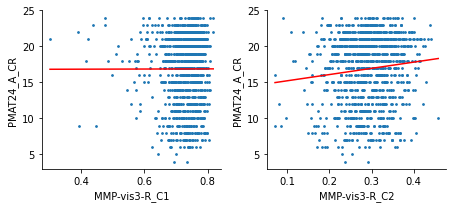

In [7]:
info_file = pjoin(proj_dir, 'data/HCP/HCPY_SubjInfo.csv')
info_df = pd.read_csv(info_file)

# ---behavior measures---
beh_name = 'PMAT24_A_CR'
beh_file1 = '/nfs/m1/hcp/S1200_behavior.csv'
beh_file2 = '/nfs/m1/hcp/S1200_behavior_restricted.csv'
beh_df1 = pd.read_csv(beh_file1)
beh_df2 = pd.read_csv(beh_file2)
assert np.all(beh_df1['Subject'] == beh_df2['Subject'])
beh_df2 = beh_df2.drop('Subject', axis=1)
beh_df = pd.concat([beh_df1, beh_df2], axis=1)
beh_vec = np.array(beh_df[beh_name])

# limited in 1096 subjects
subj_ids_beh = beh_df['Subject'].to_list()
subj_indices = [subj_ids_beh.index(i) for i in info_df['subID']]
beh_vec = beh_vec[subj_indices]
non_nan_vec = ~np.isnan(beh_vec)
print('#valid subject:', np.sum(non_nan_vec))
beh_vec = beh_vec[non_nan_vec]

# ---HCPY-M+T_fit_PC_subj-wise---
mt_fit_pc_names = ['MMP-vis3-R_C1', 'MMP-vis3-R_C2']
mt_fit_pc_file = pjoin(anal_dir, 'fit/HCPY-M+T_fit_PC_subj-wise.pkl')
mt_fit_pc_data = pkl.load(open(mt_fit_pc_file, 'rb'))

# plot
fig, axes = plt.subplots(1, 2, figsize=(6.4, 3))
for idx, name in enumerate(mt_fit_pc_names):
    ax = axes[idx]
    x = mt_fit_pc_data[name][non_nan_vec]
    plot_polyfit(x, beh_vec, 1, color='r', s=3, ax=ax)
    print('pearsonr', pearsonr(x, beh_vec))
    ax.set_xlabel(name)
    ax.set_ylabel(beh_name)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(pjoin(work_dir, f'gradient-corr-beh.jpg'))

## 梯度权重幅值与行为指标的相关

===CogCrystalComp_Unadj===
---PC1---
#subj: 1028
polynomial:
  
-262.7 x + 128.9

score: PearsonRResult(statistic=0.046361863595677365, pvalue=0.13742076223367436)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=-0.04636186359567736, pvalue=0.13742076223367436)

---PC2---
#subj: 1036
polynomial:
  
327.2 x + 103.7

score: PearsonRResult(statistic=0.15221261582679305, pvalue=8.564116454265313e-07)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.15221261582679319, pvalue=8.564116454264796e-07)

===CogFluidComp_Unadj===
---PC1---
#subj: 1030
polynomial:
  
110.3 x + 110.3

score: PearsonRResult(statistic=0.01596581567056637, pvalue=0.6087831939925392)
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.01596581567056627, pvalue=0.6087831939925392)

---PC2---
#subj: 1039
polynomial:
  
157.4 x + 108.5

score: PearsonRResult(statistic=0.059673698567928965, pvalue=0.05449362949073409)
pearsonr(x, y, alternative='two-sided'):
 PearsonRR

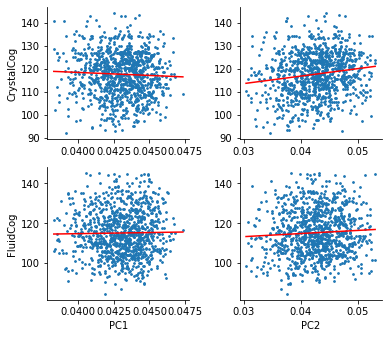

In [3]:
iqr_coef = 1.5  # None, float

# figsize = (5.5, 2.4)
# beh_names = ('CogTotalComp_Unadj',)

figsize = (5.5, 4.8)
beh_names = ('CogCrystalComp_Unadj', 'CogFluidComp_Unadj')

Hemi = 'R'
vis_name=f'MMP-vis3-{Hemi}'
pc_names = ('C1', 'C2')
m_file = pjoin(
    anal_dir, 'decomposition/'
    f'HCPY-M+corrT_{vis_name}_zscore1_PCA-subj_M.csv')
t_file = pjoin(
    anal_dir, 'decomposition/'
    f'HCPY-M+corrT_{vis_name}_zscore1_PCA-subj_corrT.csv')
info_file = pjoin(proj_dir, 'data/HCP/HCPY_SubjInfo.csv')
beh_file1 = '/nfs/z1/HCP/HCPYA/S1200_behavior.csv'
beh_file2 = '/nfs/z1/HCP/HCPYA/S1200_behavior_restricted.csv'
out_file = pjoin(work_dir, f'MT-corr-beh_{Hemi}.jpg')
# out_file = 'show'

n_pc = len(pc_names)
n_beh = len(beh_names)
m_df = pd.read_csv(m_file, usecols=pc_names)
t_df = pd.read_csv(t_file, usecols=pc_names)
mt_df = np.abs(m_df) + np.abs(t_df)
beh_df1 = pd.read_csv(beh_file1, index_col='Subject')
beh_df2 = pd.read_csv(beh_file2, index_col='Subject')
assert np.all(beh_df1.index == beh_df2.index)
beh_df = pd.concat([beh_df1, beh_df2], axis=1)
info_df = pd.read_csv(info_file, index_col='subID')
beh_df = beh_df.loc[info_df.index, beh_names]

# plot
fig, axes = plt.subplots(n_beh, n_pc, figsize=figsize)
for beh_idx, beh_name in enumerate(beh_names):
    beh_vec = beh_df[beh_name].values
    non_nan_vec = ~np.isnan(beh_vec)
    print(f'==={beh_name}===')
    beh_vec = beh_vec[non_nan_vec]
    if iqr_coef is not None:
        outlier_mask1 = outlier_iqr(beh_vec, iqr_coef)
    for pc_idx, pc_name in enumerate(pc_names):
        print(f'---P{pc_name}---')
        if n_beh == 1:
            ax = axes[pc_idx]
        elif n_pc == 1:
            ax = axes[beh_idx]
        else:
            ax = axes[beh_idx, pc_idx]
        mt_vec = mt_df[pc_name].values[non_nan_vec]
        if iqr_coef is not None:
            outlier_mask2 = outlier_iqr(mt_vec, iqr_coef)
            outlier_mask = np.logical_or(outlier_mask1, outlier_mask2)
            mask = ~outlier_mask
            x = mt_vec[mask]
            y = beh_vec[mask]
        else:
            x = mt_vec
            y = beh_vec
        print('#subj:', x.size)
        plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
        print("pearsonr(x, y, alternative='two-sided'):\n",
              pearsonr(x, y, alternative='two-sided'))
        print()
        if beh_idx == n_beh-1:
            ax.set_xlabel(f'P{pc_name}')
        if pc_idx == 0:
            ax.set_ylabel(beh_name2abbr[beh_name])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# 梯度空间距离预测功能与结构连接强度

## 梯度空间距离预测功能连接强度

### roi-level

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


polynomial:
  
-0.003641 x + 0.4526

score: PearsonRResult(statistic=0.4323512361590887, pvalue=2.2778306462209457e-44)
pearsonr(x, y, alternative='two-sided') PearsonRResult(statistic=-0.4323512361590887, pvalue=2.2778306462209457e-44)

---abs---
polynomial:
  
-0.003641 x + 0.4526

score: PearsonRResult(statistic=0.4323512361590887, pvalue=2.2778306462209457e-44)
pearsonr(x, y1, alternative='two-sided') PearsonRResult(statistic=-0.4323512361590887, pvalue=2.2778306462209457e-44)


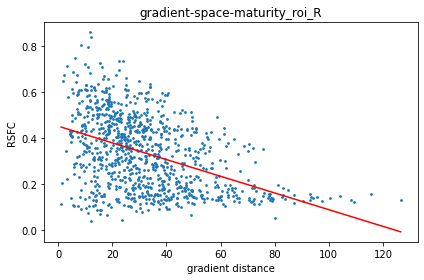

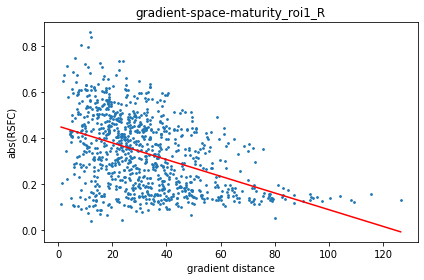

In [3]:
hemi = 'rh'
Hemi = hemi2Hemi[hemi]
vis_name = f'MMP-vis3-{Hemi}'
rsfc_mat_name = 'r-matrix'
rsfc_type = 'corr'  # corr, corr dist
out_name = 'gradient-space-maturity'
# out_name = 'surface-space-control'
# out_name = 'M+T-control'

atlas = Atlas('HCP-MMP')
rois = get_rois(vis_name)
n_roi = len(rois)
n_item = int((n_roi * n_roi - n_roi) / 2)
idx_mat = np.tri(n_roi, k=-1, dtype=bool).T

# prepare y
rsfc_file = pjoin(proj_dir, 'data/HCP/HCPY-avg_RSFC_HCP-MMP1.pkl')
rsfc_data = pkl.load(open(rsfc_file, 'rb'))
roi_indices = [rsfc_data['roi_name'].index(i) for i in rois]
rsfc_mat = rsfc_data[rsfc_mat_name][roi_indices][:, roi_indices]
assert np.all(np.diag(rsfc_mat) == 1)
if rsfc_type == 'corr':
    y = rsfc_mat[idx_mat]
    y1 = np.abs(y)
    ylabel = 'RSFC'
    ylabel1 = 'abs(RSFC)'
elif rsfc_type == 'corr dist':
    y = 1 - rsfc_mat[idx_mat]
    y1 = 1 - np.abs(rsfc_mat[idx_mat])
    ylabel = '1-RSFC'
    ylabel1 = '1-abs(RSFC)'
else:
    raise ValueError

if out_name == 'gradient-space-maturity':
    # prepare x (梯度空间)
    n_pc = 2
    pc_maps = nib.load(pjoin(
            anal_dir, f'decomposition/HCPY-M+corrT_{vis_name}_zscore1_PCA-subj.dscalar.nii'
        )).get_fdata()[:n_pc]
    coords = np.zeros((n_roi, n_pc))
    for roi_idx, roi in enumerate(rois):
        mask = atlas.get_mask(roi)[0]
        coords[roi_idx] = np.mean(pc_maps[:, mask], 1)
    x = pdist(coords)
    xlabel = 'gradient distance'

elif out_name == 'surface-space-control':
    # prepare x （surface空间）
    gdist_file = pjoin(anal_dir, f'gdist/gdist-between-all-pair-vtx_{vis_name}.pkl')
    gdist = pkl.load(open(gdist_file, 'rb'))
    vertices = gdist[f'vtx_number_in_32k_fs_{Hemi}'].tolist()
    reader = CiftiReader(mmp_map_file)
    mask = reader.get_data(hemi2stru[hemi], True)[0]
    roi2indices = {}
    for roi in rois:
        vertices_roi = np.where(mask == atlas.roi2label[roi])[0]
        indices = [vertices.index(vtx) for vtx in vertices_roi]
        roi2indices[roi] = indices
    x = np.zeros(n_item)
    x_idx = 0
    for s_idx, roi1 in enumerate(rois[:-1], 1):
        indices1 = roi2indices[roi1]
        ds1 = gdist['gdist'][indices1]
        for roi2 in rois[s_idx:]:
            indices2 = roi2indices[roi2]
            ds2 = ds1[:, indices2]
            x[x_idx] = np.mean(ds2)
            x_idx += 1

elif out_name == 'M+T-control':
    # prepare x （M+T空间）
    m_map = nib.load(s1200_avg_myelin).get_fdata()
    t_map = nib.load(s1200_avg_thickness).get_fdata()
    coords = np.zeros((n_roi, 2))
    for roi_idx, roi in enumerate(rois):
        mask = atlas.get_mask(roi)
        coords[roi_idx, 0] = np.mean(m_map[mask])
        coords[roi_idx, 1] = np.mean(t_map[mask])
    x = pdist(coords)

else:
    raise ValueError

fig, ax = plt.subplots(1, 1)
plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(f'{out_name}_roi_{Hemi}')
fig.tight_layout()
fig.savefig(pjoin(work_dir, f'{out_name}_roi_{Hemi}.jpg'))
print("pearsonr(x, y, alternative='two-sided')",
      pearsonr(x, y, alternative='two-sided'))

print('\n---abs---')
fig1, ax1 = plt.subplots(1, 1)
plot_polyfit(x, y1, 1, color='r', s=3, ax=ax1)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel1)
ax1.set_title(f'{out_name}_roi1_{Hemi}')
fig1.tight_layout()
fig1.savefig(pjoin(work_dir, f'{out_name}_roi1_{Hemi}.jpg'))
print("pearsonr(x, y1, alternative='two-sided')",
      pearsonr(x, y1, alternative='two-sided'))

## 梯度空间距离预测结构连接强度

In [ ]:
mask_name = 'MMP-vis3-R'
atlas = Atlas('HCP-MMP')
n_pc = 2
pc_file = pjoin(anal_dir,
    'decomposition/HCPY-M+corrT_MMP-vis3-R_zscore1_PCA-subj.dscalar.nii')
sc_file = pjoin(anal_dir,
    f'stru_conn/intersect_bundles_{mask_name}.pkl')
out_file = pjoin(work_dir, 'grad-corr-SC.jpg')

rois = get_rois(mask_name)
n_roi = len(rois)
n_item = int((n_roi * n_roi - n_roi) / 2)

# 准备各ROI的梯度空间坐标
pc_maps = nib.load(pc_file).get_fdata()[:n_pc]
roi2coord = {}
for roi in rois:
    mask = atlas.get_mask(roi)[0]
    roi2coord[roi] = np.mean(pc_maps[:, mask], 1)

# prepare x, y
sc_data = pkl.load(open(sc_file, 'rb'))
x = []
y = []
for roi1, roi1_dict in sc_data.items():
    for roi2, roi2_dict in roi1_dict.items():
        grad_dist = np.linalg.norm(roi2coord[roi1] - roi2coord[roi2])
        x.append(grad_dist)
        sc_num = np.sum([len(i) for i in roi2_dict.values()])
        y.append(sc_num)

# plot
fig, ax = plt.subplots(1, 1)
plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
ax.set_xlabel('distance in gradient space')
ax.set_ylabel('strength of SC')
fig.tight_layout()
fig.savefig(out_file)
print('pearsonr', pearsonr(x, y))
print(spearmanr(x, y))

## 梯度空间距离预测测地距离

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


polynomial:
  
0.5975 x + 37.39

score: (0.45072604584129605, 1.6120088185175184e-48)
pearsonr (0.45072604584129605, 1.6120088185175184e-48)
SpearmanrResult(correlation=0.4174167343588526, pvalue=3.5273210319856313e-41)


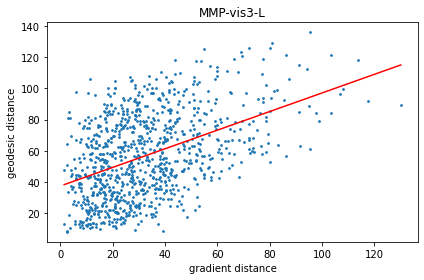

In [4]:
hemi = 'lh'
Hemi = hemi2Hemi[hemi]
vis_name = f'MMP-vis3-{Hemi}'
atlas = Atlas('HCP-MMP')
rois = get_rois(vis_name)
n_roi = len(rois)
n_item = int((n_roi * n_roi - n_roi) / 2)

# prepare x (梯度空间)
n_pc = 2
pc_maps = nib.load(pjoin(
    anal_dir, f'decomposition/HCPY-M+corrT_{vis_name}_zscore1_PCA-subj.dscalar.nii'
)).get_fdata()[:n_pc]
coords = np.zeros((n_roi, n_pc))
for roi_idx, roi in enumerate(rois):
    mask = atlas.get_mask(roi)[0]
    coords[roi_idx] = np.mean(pc_maps[:, mask], 1)
x = pdist(coords)

# prepare y （surface空间）
gdist_file = pjoin(anal_dir, f'gdist/gdist-between-all-pair-vtx_{vis_name}.pkl')
gdist = pkl.load(open(gdist_file, 'rb'))
vertices = gdist[f'vtx_number_in_32k_fs_{Hemi}'].tolist()
reader = CiftiReader(mmp_map_file)
mask = reader.get_data(hemi2stru[hemi], True)[0]
roi2indices = {}
for roi in rois:
    vertices_roi = np.where(mask == atlas.roi2label[roi])[0]
    indices = [vertices.index(vtx) for vtx in vertices_roi]
    roi2indices[roi] = indices
y = np.zeros(n_item)
y_idx = 0
for s_idx, roi1 in enumerate(rois[:-1], 1):
    indices1 = roi2indices[roi1]
    ds1 = gdist['gdist'][indices1]
    for roi2 in rois[s_idx:]:
        indices2 = roi2indices[roi2]
        ds2 = ds1[:, indices2]
        y[y_idx] = np.mean(ds2)
        y_idx += 1

fig, ax = plt.subplots(1, 1)
plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
ax.set_xlabel('gradient distance')
ax.set_ylabel('geodesic distance')
ax.set_title(vis_name)
fig.tight_layout()
fig.savefig(pjoin(work_dir, f'grad-corr-geo_dist_roi_{Hemi}.jpg'))
print('pearsonr', pearsonr(x, y))
print(spearmanr(x, y))

# Development of gradient parameters

## pca_HCPDA_MT_SW_param_local

***early***
===gradient range===
---C1---
polynomial:
  
-0.1799 x + 20.68

score: (0.4897910359236042, 6.168473619351625e-05)


---C2---
polynomial:
  
-0.1785 x + 18.06

score: (0.5769722607033929, 1.1322127427502742e-06)


===gradient variation===
---C1---
polynomial:
  
-0.04857 x + 4.099

score: (0.9233036379642136, 3.3757707216535904e-26)


---C2---
polynomial:
  
-0.01256 x + 2.613

score: (0.5950202268527583, 4.2546587497823324e-07)


===gradient dispersion===
polynomial:
  
-799.1 x + 4.738e+04

score: (0.9377239531646179, 8.896290253886053e-29)


***dorsal***
===gradient range===
---C1---
polynomial:
  
-0.2921 x + 22.89

score: (0.8662910905283541, 1.9511694828163014e-19)


---C2---
polynomial:
  
0.202 x + 13.75

score: (0.6821075660578992, 1.422107154391973e-09)


===gradient variation===
---C1---
polynomial:
  
-0.02068 x + 4.245

score: (0.6778371226428843, 1.967327393574953e-09)


---C2---
polynomial:
  
0.03236 x + 2.188

score: (0.82487886846966, 3.0191960794668934e-1

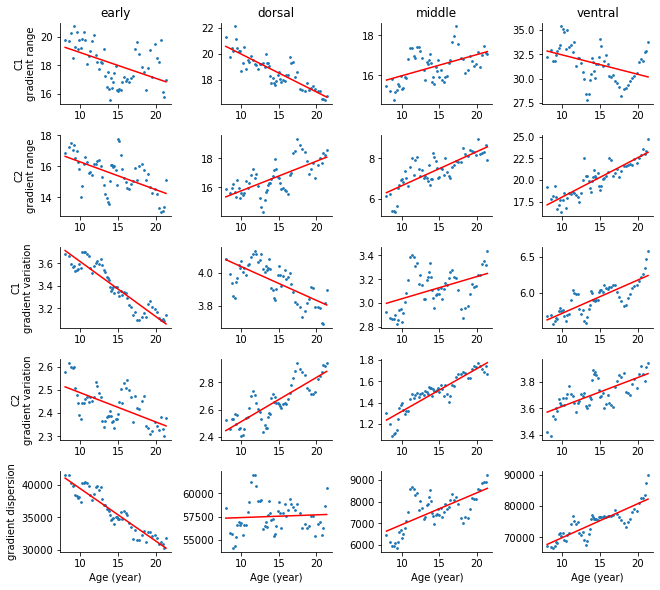

In [6]:
title1 = 'HCPD-M+T_MMP-vis3-R_zscore1_PCA-subj'
title2 = 'SW-width50-step10-merge'
out_file = pjoin(work_dir, f'{title1}_{title2}_param_local-EDMV.jpg')

figsize = (9.3, 8.3)
local_names = ['early', 'dorsal', 'middle', 'ventral']
pc_names = ['C1', 'C2']
param_names = ['gradient range', 'gradient variation', 'gradient dispersion']

fpath = pjoin(anal_dir, f'decomposition/{title1}_{title2}_param_local-EDMV.pkl')
data = pkl.load(open(fpath, 'rb'))
n_pc = len(pc_names)
n_row = n_pc * len(param_names)
n_col = len(local_names)
if 'gradient dispersion' in param_names:
    assert param_names.count('gradient dispersion') == 1
    assert 'gradient dispersion' == param_names[-1]
    n_row = n_row - n_pc + 1
fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
x = data['age in months'] / 12
for local_idx, local_name in enumerate(local_names):
    print(f'***{local_name}***')
    row_idx = 0
    for param_name in param_names:
        print(f'==={param_name}===')
        if param_name == 'gradient dispersion':
            ax = axes[-1, local_idx]
            plot_polyfit(x, data[local_name][param_name], 1, color='r', s=3, ax=ax)
            print('\n')
            ax.set_xlabel('Age (year)')
            if local_idx == 0:
                ax.set_ylabel(param_name)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            continue
        for pc_name in pc_names:
            print(f'---{pc_name}---')
            ax = axes[row_idx, local_idx]
            plot_polyfit(x, data[local_name][f'{pc_name} {param_name}'], 1, color='r', s=3, ax=ax)
            print('\n')
            if row_idx == 0:
                ax.set_title(local_name)
            if local_idx == 0:
                ax.set_ylabel(f'{pc_name}\n{param_name}')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            row_idx += 1

fig.tight_layout()
if out_file is None:
    fig.show()
else:
    fig.savefig(out_file)

## pca_HCPDA_MT_SW_param

### old

===explanation ratio===
---C1---
polynomial:
  
-0.001462 x + 0.5012

score: (0.9684733537153276, 1.46776056275684e-41)


---C2---
polynomial:
  
4.594e-05 x + 0.08765

score: (0.15357409267275257, 0.2111687066439809)


===gradient variation===
---C1---
polynomial:
  
-0.01079 x + 7.08

score: (0.9387939766923727, 2.950184559145412e-32)


---C2---
polynomial:
  
0.001087 x + 2.943

score: (0.2154098752225136, 0.07770548817508578)


===gradient range===
---C1---
polynomial:
  
-0.004553 x + 42.43

score: (0.050128649101231645, 0.6847697936647923)


---C2---
polynomial:
  
0.06227 x + 21.19

score: (0.5811529912597623, 2.0344629755575309e-07)


===gradient dispersion===
polynomial:
  
-902 x + 3.997e+05

score: (0.8946589291991303, 8.740501030410413e-25)




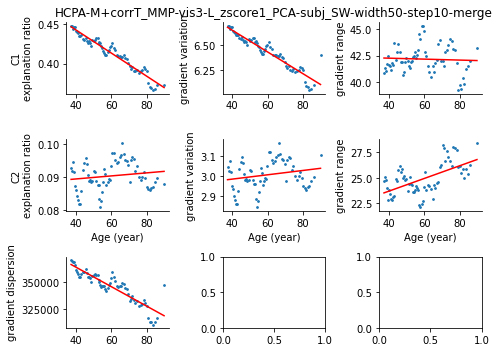

In [5]:
title1 = 'HCPA-M+corrT_MMP-vis3-L_zscore1_PCA-subj'
title2 = 'SW-width50-step10-merge'
out_file = pjoin(work_dir, f'{title1}_{title2}_param.jpg')

figsize = (7, 5)
pc_names = ['C1', 'C2']
param_names = ['explanation ratio', 'gradient variation', 'gradient range',
               'gradient dispersion']

fpath = pjoin(anal_dir, f'decomposition/{title1}_{title2}_param.pkl')
data = pkl.load(open(fpath, 'rb'))
n_row = len(pc_names)
n_col = len(param_names)
if 'gradient dispersion' in param_names:
    assert param_names.count('gradient dispersion') == 1
    assert 'gradient dispersion' == param_names[-1]
    n_row += 1
    n_col -= 1
fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
x = data['age in months'] / 12
for col_idx, param_name in enumerate(param_names):
    print(f'==={param_name}===')
    if param_name == 'gradient dispersion':
        ax = axes[-1, 0]
        plot_polyfit(x, data[param_name], 1, color='r', s=3, ax=ax)
        print('\n')
        ax.set_ylabel(param_name)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        continue
    for row_idx, pc_name in enumerate(pc_names):
        print(f'---{pc_name}---')
        ax = axes[row_idx, col_idx]
        plot_polyfit(x, data[f'{pc_name} {param_name}'], 1, color='r', s=3, ax=ax)
        print('\n')
        if row_idx == 0 and col_idx == int(n_col / 2):
            ax.set_title(f'{title1}_{title2}')
        if row_idx == n_row - 2:
            ax.set_xlabel('Age (year)')
        if col_idx == 0:
            ax.set_ylabel(f'{pc_name}\n{param_name}')
        else:
            ax.set_ylabel(param_name)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file is None:
    fig.show()
else:
    fig.savefig(out_file)

### tmp

---C1---
polynomial:
  
-0.001451 x + 0.4876

score: 0.908331761989832
---C2---
polynomial:
  
9.409e-05 x + 0.1019

score: 0.09116157641397149


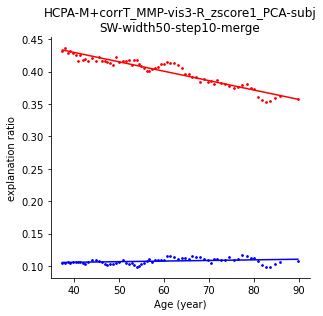

In [5]:
title1 = 'HCPA-M+corrT_MMP-vis3-R_zscore1_PCA-subj'
title2 = 'SW-width50-step10-merge'
out_file = pjoin(work_dir, f'{title1}_{title2}_param.jpg')

figsize = (4.5, 4.5)
pc_names = ['C1', 'C2']
pc2color = {'C1': 'r', 'C2': 'b'}
param_name = 'explanation ratio'

fpath = pjoin(anal_dir, f'decomposition/{title1}_{title2}_param.pkl')
data = pkl.load(open(fpath, 'rb'))
fig, ax = plt.subplots(1, 1, figsize=figsize)
x = data['age in months'] / 12
for row_idx, pc_name in enumerate(pc_names):
    print(f'---{pc_name}---')
    plot_polyfit(x, data[f'{pc_name} {param_name}'], 1, scoring='r2_score',
                 color=pc2color[pc_name], s=3, c=pc2color[pc_name], ax=ax)
ax.set_title(f'{title1}\n{title2}')
ax.set_xlabel('Age (year)')
ax.set_ylabel(param_name)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(out_file)

# Plot RSM

## RSM8

===early C1===
polynomial:
  
0.006613 x + 0.7569

score: (0.8820602538142684, 6.0650074152084605e-21)


===dorsal C1===
polynomial:
  
0.002445 x + 0.9174

score: (0.8735287375848477, 4.2019668808448813e-20)


===middle C1===
polynomial:
  
0.0009734 x + 0.9579

score: (0.5395577040714302, 7.220525033202574e-06)


===ventral C1===
polynomial:
  
0.002066 x + 0.9336

score: (0.9013524084749547, 4.1309405151403155e-23)


===early C2===
polynomial:
  
0.004744 x + 0.7842

score: (0.7084846366236643, 1.686849410798766e-10)


===dorsal C2===
polynomial:
  
0.008703 x + 0.7663

score: (0.9300643968403932, 2.443573215016009e-27)


===middle C2===
polynomial:
  
0.009916 x + 0.7046

score: (0.7732086681873325, 2.8255624476182153e-13)


===ventral C2===
polynomial:
  
0.004543 x + 0.8092

score: (0.7111622127416923, 1.3408519638368247e-10)




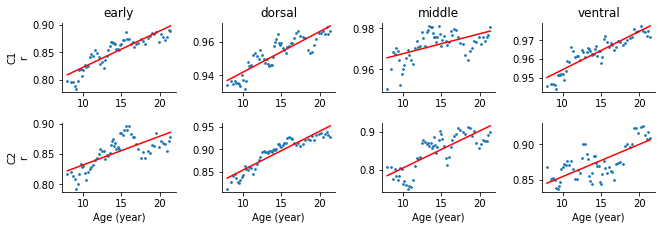

In [3]:
figsize = (9.3, 3.3)
fname = 'RSM8_M+T_MMP-vis3-R_zscore1_PCA-subj_HCPY_corr_HCPD_SW-width50-step10-merge'
pc_names = ['C1', 'C2']
local_names = ['early', 'dorsal', 'middle', 'ventral']
fpath = pjoin(anal_dir, f'RSM/{fname}.pkl')
out_file = pjoin(work_dir, f'{fname}.jpg')

n_pc = len(pc_names)
data = pkl.load(open(fpath, 'rb'))
x = data['age in months'] / 12
fig, axes = plt.subplots(n_pc, len(local_names), figsize=figsize)
for pc_idx, pc_name in enumerate(pc_names):
    for local_idx, local_name in enumerate(local_names):
        print(f'==={local_name} {pc_name}===')
        ax = axes[pc_idx, local_idx]
        row_idx = data['row_name'].index(f'{local_name} {pc_name}')
        plot_polyfit(x, data['r'][row_idx], 1, color='r', s=3, ax=ax)
        print('\n')
        if local_idx == 0:
            ax.set_ylabel(f'{pc_name}\nr')
        if pc_idx == 0:
            ax.set_title(local_name)
        if pc_idx == n_pc - 1:
            ax.set_xlabel('Age (year)')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file is None:
    fig.show()
else:
    fig.savefig(out_file)

## RSM7

### 把各窗口所有PC和主次梯度的相关画到同一axis里

[Decimal('8.0'), Decimal('21.3'), Decimal('37.4'), Decimal('89.7')]


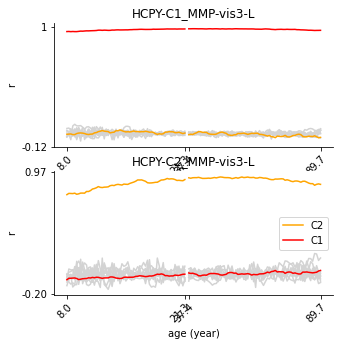

In [6]:
figsize=(5, 5)
vis_name = 'MMP-vis3-L'
dataset_names = ('HCPD', 'HCPA')
hcpy_pc_names = ('C1', 'C2')
hcpda_pc_names = 'all'
title1 = f'RSM7_M+corrT_{vis_name}_zscore1_PCA-subj'
title2 = 'HCPY-PCs_corr_HCPDA-PCs'
title3 = 'SW-width50-step10-merge'
out_file = pjoin(work_dir, f'{title1}_{title2}_{title3}.jpg')
# out_file = 'show'

n_x = 0
n_hcpy_pc = len(hcpy_pc_names)
xticks = []
xticklabels = []
fig, axes = plt.subplots(n_hcpy_pc, 1, figsize=figsize)
for dataset_idx, dataset_name in enumerate(dataset_names):
    fpath = pjoin(anal_dir, f'RSM/{title1}_HCPY_corr_{dataset_name}_{title3}.pkl')
    data = pkl.load(open(fpath, 'rb'))
    if hcpda_pc_names == 'all':
        rows = data['row_name'][::-1]
    else:
        rows = hcpda_pc_names
    n_win = data['n_win']
    x = np.arange(dataset_idx, n_win+dataset_idx) + n_x
    n_x += n_win
    ages = data['age in months'] / 12
    xticks.extend([x[0], x[-1]])
    xticklabels.extend([round_decimal(ages[0], 1, 'ceil'),
                        round_decimal(ages[-1], 1, 'floor')])
    for hcpy_pc_idx, hcpy_pc_name in enumerate(hcpy_pc_names):
        ax = axes[hcpy_pc_idx]
        cols = [f'HCPY-{hcpy_pc_name}_corr_Win{i}' for i in range(1, n_win + 1)]
        col_indices = [data['col_name'].index(i) for i in cols]
        for row_name in rows:
            row_idx = data['row_name'].index(row_name)
            y = data['r'][row_idx, col_indices]
            if row_name in ('C1', 'C2'):
                color = meas2color[f'P{row_name}']
                if dataset_idx == 0:
                    ax.plot(x, y, c=color, label=row_name)
                else:
                    ax.plot(x, y, c=color)
            else:
                color = 'lightgray'
                ax.plot(x, y, c=color)

print(xticklabels)
for hcpy_pc_idx, hcpy_pc_name in enumerate(hcpy_pc_names):
    ax = axes[hcpy_pc_idx]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ylim = ax.get_ylim()
    yticks_tmp = (round_decimal(ylim[0], 2, 'ceil'),
                  round_decimal(ylim[1], 2, 'floor'))
    yticks = []
    for ytick in yticks_tmp:
        if ytick > 1:
            ytick = 1
        elif ytick < -1:
            ytick = -1
        yticks.append(ytick)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)
    ax.set_title(f'HCPY-{hcpy_pc_name}_{vis_name}')
    ax.set_ylabel('r')
    if hcpy_pc_idx == n_hcpy_pc-1:
        ax.set_xlabel('age (year)')
        ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")


if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

### 把各窗口主次PC分别和主次梯度的相关画到不同axis里

polynomial:
  
0.001911 x + 0.9456

score: (0.934804161180464, 3.297688366593887e-28)
polynomial:
  
0.008823 x + 0.7492

score: (0.9480472616217478, 4.905460575461416e-31)


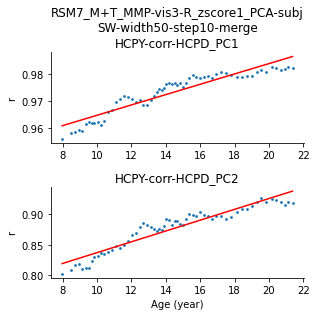

In [4]:
n_win = 61
dataset_name = 'HCPD'

# n_win = 68
# dataset_name = 'HCPA'

figsize=(4.5, 4.5)
pc_names = ['C1', 'C2']
title1 = 'RSM7_M+T_MMP-vis3-R_zscore1_PCA-subj'
title3 = 'SW-width50-step10-merge'

n_pc = len(pc_names)
fpath = pjoin(anal_dir, f'RSM/{title1}_HCPY_corr_{dataset_name}_{title3}.pkl')
out_file = pjoin(work_dir, f"RSM7_{dataset_name}.jpg")
data = pkl.load(open(fpath, 'rb'))
fig, axes = plt.subplots(n_pc, 1, figsize=figsize)
x = data['age in months'] / 12
for pc_idx, pc_name in enumerate(pc_names):
    title2 = f'HCPY-corr-{dataset_name}_P{pc_name}'
    cols = [f'HCPY-{pc_name}_corr_Win{i}' for i in range(1, n_win + 1)]
    row_idx = row_indices = data['row_name'].index(pc_name)
    col_indices = [data['col_name'].index(i) for i in cols]
    ax = axes[pc_idx]
    y = data['r'][row_idx][col_indices]
    plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
    if pc_idx == 0:
        ax.set_title(f'{title1}\n{title3}\n{title2}')
    else:
        ax.set_title(title2)
    if pc_idx == n_pc - 1:
        ax.set_xlabel('Age (year)')
    ax.set_ylabel('r')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file is None:
    fig.show()
else:
    fig.savefig(out_file)


### 把各窗口主次PC分别和主次梯度的相关画到同一axis里

polynomial:
  
-0.0004163 x + 1

score: 0.8843923424422189
polynomial:
  
-0.001743 x + 1.008

score: 0.8791702765775433


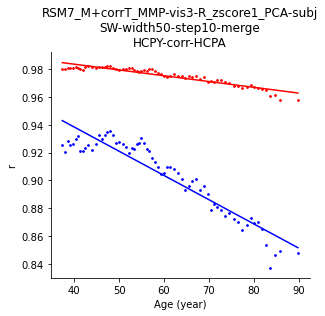

In [5]:
# n_win = 61
# vis_name = 'MMP-vis3-R'
# dataset_name = 'HCPD'

n_win = 68
vis_name = 'MMP-vis3-R'
dataset_name = 'HCPA'

figsize=(4.5, 4.5)
pc_names = ['C1', 'C2']
pc2color = {'C1': 'r', 'C2': 'b'}
title1 = f'RSM7_M+corrT_{vis_name}_zscore1_PCA-subj'
title2 = f'HCPY-corr-{dataset_name}'
title3 = 'SW-width50-step10-merge'

fpath = pjoin(anal_dir, f'RSM/{title1}_HCPY_corr_{dataset_name}_{title3}.pkl')
out_file = pjoin(work_dir, f"RSM7_{dataset_name}_{vis_name}.jpg")
data = pkl.load(open(fpath, 'rb'))
fig, ax = plt.subplots(1, 1, figsize=figsize)
x = data['age in months'] / 12
for pc_idx, pc_name in enumerate(pc_names):
    cols = [f'HCPY-{pc_name}_corr_Win{i}' for i in range(1, n_win + 1)]
    row_idx = data['row_name'].index(pc_name)
    col_indices = [data['col_name'].index(i) for i in cols]
    y = data['r'][row_idx][col_indices]
    plot_polyfit(x, y, 1, color=pc2color[pc_name], s=3,
                 scoring='r2_score', c=pc2color[pc_name], ax=ax)

ax.set_title(f'{title1}\n{title3}\n{title2}')
ax.set_xlabel('Age (year)')
ax.set_ylabel('r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(out_file)


# Plot Fit

## weight_CCA_beh

polynomial:
  
0.06672 x + 0.01911

score: PearsonRResult(statistic=0.059239060319874096, pvalue=0.05748155054813154)
pearsonr(x, y, alternative='greater'):
 PearsonRResult(statistic=0.059239060319874096, pvalue=0.02874077527406577)
polynomial:
  
0.2133 x - 0.009326

score: PearsonRResult(statistic=0.19466544895002375, pvalue=2.6910283959299753e-10)
pearsonr(x, y, alternative='greater'):
 PearsonRResult(statistic=0.19466544895002375, pvalue=1.3455141979649877e-10)


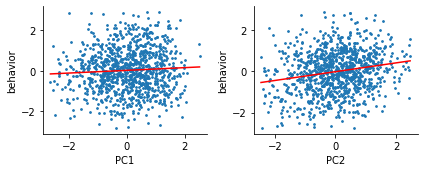

In [3]:
iqr_coef = 1.5
figsize = (6, 2.5)
vis_name = 'MMP-vis3-R'
pc_names = ('PC1', 'PC2')
pc_name2v = {'PC1': 'v9', 'PC2': 'v10'}

fpath = pjoin(anal_dir, 'fit/weight-CCA-beh_{vis_name}_{v}.pkl')
out_file = pjoin(work_dir, f'weight-CCA-beh_{vis_name}.jpg')
# out_file = 'show'

fig, axes = plt.subplots(1, 2, figsize=figsize)
for pc_idx, pc_name in enumerate(pc_names):
    ax = axes[pc_idx]
    cca_dict = pkl.load(open(fpath.format(
        vis_name=vis_name, v=pc_name2v[pc_name]), 'rb'))
    x = cca_dict['X_trans'][:, 0]
    y = cca_dict['Y_trans'][:, 0]
    if iqr_coef is not None:
        outlier_mask1 = outlier_iqr(x, iqr_coef)
        outlier_mask2 = outlier_iqr(y, iqr_coef)
        outlier_mask = np.logical_or(outlier_mask1, outlier_mask2)
        mask = ~outlier_mask
        x = x[mask]
        y = y[mask]
    plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
    print("pearsonr(x, y, alternative='greater'):\n",
          pearsonr(x, y, alternative='greater'))
    ax.set_xlabel(pc_name)
    ax.set_ylabel('behavior')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

## HCPDA_MT_fit_PC12_SW

### old

polynomial:
  
-0.0004697 x + 0.9952

score: (0.8999658583614474, 1.731068271811442e-25)
polynomial:
  
-0.001703 x + 0.9847

score: (0.9045461022138921, 3.971865652938619e-26)


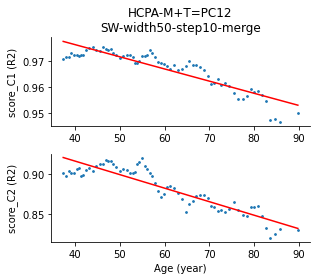

In [4]:
fname1 = 'HCPA-M+T=PC12'
fname2 = 'SW-width50-step10-merge'
figsize = (4.5, 4)
out_file = pjoin(work_dir, f'{fname1}_{fname2}_score.jpg')

# out_file = None

fpath = pjoin(anal_dir, f'fit/{fname1}_{fname2}.pkl')
data = pkl.load(open(fpath, 'rb'))
pc_names = ['C1', 'C2']
n_pc = len(pc_names)
x = data['age in months'] / 12
fig, axes = plt.subplots(n_pc, 1, figsize=figsize)
for pc_idx, pc_name in enumerate(pc_names):
    ax = axes[pc_idx]
    y = data[f'score_{pc_name}']
    plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
    if pc_idx == 0:
        ax.set_title(f'{fname1}\n{fname2}')
    if pc_idx == n_pc - 1:
        ax.set_xlabel('Age (year)')
    ax.set_ylabel(f'score_{pc_name} (R2)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file is None:
    fig.show()
else:
    fig.savefig(out_file)

### new

polynomial:
  
0.00221 x + 0.9314

score: 0.9177914037080732
polynomial:
  
0.01389 x + 0.5953

score: 0.8694670630899992


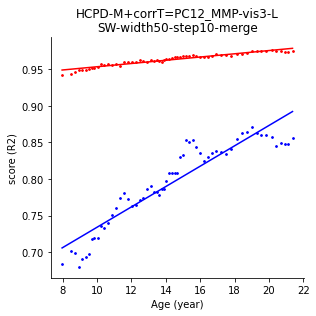

In [6]:
fname1 = 'HCPD-M+corrT=PC12_MMP-vis3-L'
fname2 = 'SW-width50-step10-merge'
figsize = (4.5, 4.5)
out_file = pjoin(work_dir, f'{fname1}_{fname2}_score.jpg')
# out_file = 'show'

fpath = pjoin(anal_dir, f'fit/{fname1}_{fname2}.pkl')
data = pkl.load(open(fpath, 'rb'))
pc_names = ['C1', 'C2']
pc2color = {'C1': 'r', 'C2': 'b'}
n_pc = len(pc_names)
x = data['age in months'] / 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
for pc_name in pc_names:
    y = data[f'score_{pc_name}']
    plot_polyfit(x, y, 1, color=pc2color[pc_name], s=3,
                 scoring='r2_score', c=pc2color[pc_name], ax=ax)

ax.set_title(f'{fname1}\n{fname2}')
ax.set_xlabel('Age (year)')
ax.set_ylabel(f'score (R2)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# 结构PC1/2与其它指标在顶点级别上的相关

## 在整个视觉皮层上的相关

pixdim[1,2,3] should be non-zero; setting 0 dims to 1



---PC1---
polynomial:
  
5.459 x - 28.07

score: PearsonRResult(statistic=0.6442202325301786, pvalue=2.8571826834099127e-295)
pmt_test.statistic:
 0.6442202325301787
pmt_test.pvalue:
 0.00019998000199980003
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.6442202325301787, pvalue=2.857182683409263e-295)

---PC2---
polynomial:
  
0.2622 x - 2.837

score: PearsonRResult(statistic=0.050203108634518934, pvalue=0.011751708345566146)
pmt_test.statistic:
 0.05020310863451895
pmt_test.pvalue:
 0.0105989401059894
pearsonr(x, y, alternative='two-sided'):
 PearsonRResult(statistic=0.05020310863451895, pvalue=0.011751708345566146)


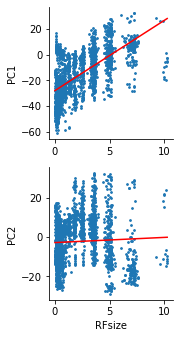

In [5]:
# mask_type = 'MMP-vis3'
# mask_type = 'R2_limit'
mask_type = 'Wang2015'

Hemi = 'R'
meas_name = 'RFsize'
figsize = (2.6, 4.8)
n_pc = 2
pc_names = [f'PC{i}' for i in range(1, n_pc + 1)]
meas2file = {
    'ECC': s1200_avg_eccentricity,
    'RFsize': s1200_avg_RFsize}
out_file = pjoin(work_dir, f'PC12-corr-{meas_name}-{Hemi}.jpg')
# out_file = 'show'

def statistic(x, y):
    return pearsonr(x, y)[0]

mask = Atlas('HCP-MMP').get_mask(get_rois(f'MMP-vis3-{Hemi}'))[0]
if mask_type in 'MMP-vis3':
    pass
elif mask_type == 'R2_limit':
    mask_tmp = nib.load(s1200_avg_R2).get_fdata()[0, :LR_count_32k] > 9.8
    mask = np.logical_and(mask, mask_tmp)
elif mask_type == 'Wang2015':
    # R_FEF和R_IPS5与MMP-vis3-R没有重合的部分，前者在额叶，后者本身只有3个顶点。
    mask_tmp = Atlas('Wang2015').get_mask(get_rois(f'Wang2015-{Hemi}'))[0]
    mask = np.logical_and(mask, mask_tmp)
else:
    raise ValueError('unsupported mask_type:', mask_type)

map_pcs = nib.load(pjoin(
    anal_dir, f'decomposition/HCPY-M+corrT_MMP-vis3-{Hemi}_zscore1_PCA-subj.dscalar.nii'
)).get_fdata()[:n_pc, mask]
map_meas = nib.load(meas2file[meas_name]).get_fdata()[0, :LR_count_32k]
map_meas = map_meas[mask]

fig, axes = plt.subplots(n_pc, 1, figsize=figsize)
x = map_meas
for pc_idx, pc_name in enumerate(pc_names):
    ax = axes[pc_idx]
    print(f'\n---{pc_name}---')
    y = map_pcs[pc_idx]
    plot_polyfit(x, y, 1, color='r', s=3, ax=ax)
    pmt_test = permutation_test(
        (x, y), statistic, permutation_type='pairings',
        vectorized=False, n_resamples=10000, alternative='two-sided',
        random_state=7)
    print('pmt_test.statistic:\n', pmt_test.statistic)
    print('pmt_test.pvalue:\n', pmt_test.pvalue)
    print("pearsonr(x, y, alternative='two-sided'):\n",
          pearsonr(x, y, alternative='two-sided'))
    ax.set_ylabel(pc_name)
    if pc_idx == (n_pc - 1):
        ax.set_xlabel(meas_name)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

## 在早期的那几个视觉区域中，画PC1/2和eccentricity之间的散点图

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


polynomial:
  
-0.2189 x - 3.634

score: (0.6028927503274788, 4.671817153322881e-79)
polynomial:
  
0.1195 x + 6.463

score: (0.3309881202388443, 1.4168461118338246e-21)
polynomial:
  
-0.07216 x + 5.29

score: (0.09047934271342539, 0.02580379641537228)
polynomial:
  
0.1411 x + 8.064

score: (0.40963580035426195, 5.803016205023234e-26)
polynomial:
  
0.3843 x + 13.99

score: (0.5629132976314455, 2.5961678980127633e-31)
polynomial:
  
-0.1395 x + 5.309

score: (0.2146652247295677, 4.216358225640636e-05)
polynomial:
  
-0.02307 x + 2.653

score: (0.08159632306044795, 0.16144380185187454)
polynomial:
  
0.2369 x + 1.824

score: (0.32495282865266695, 1.0459364554396725e-08)
polynomial:
  
0.03832 x + 7.841

score: (0.4041047719197398, 3.8572733219901374e-07)
polynomial:
  
-0.04778 x + 6.911

score: (0.27682974398690036, 0.0006880065768553137)


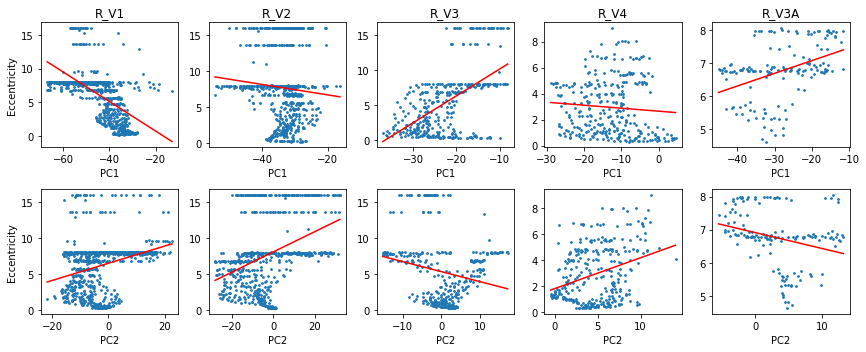

In [8]:
figsize = (12, 5)
n_pc = 2
pc_names = [f'PC{i}' for i in range(1, n_pc + 1)]
rois = ['R_V1', 'R_V2', 'R_V3', 'R_V4', 'R_V3A']
n_roi = len(rois)
out_file = pjoin(work_dir, 'PC12-corr-ECC_area.jpg')
# out_file = None

map_pcs = nib.load(pjoin(
    anal_dir, 'decomposition/HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj.dscalar.nii'
)).get_fdata()[:n_pc]
map_ecc = nib.load(s1200_avg_eccentricity).get_fdata()[0, :LR_count_32k]
atlas = Atlas('HCP-MMP')

fig, axes = plt.subplots(n_pc, n_roi, figsize=figsize)
for roi_idx, roi in enumerate(rois):
    mask = atlas.get_mask(roi)[0]
    for pc_idx, pc_name in enumerate(pc_names):
        ax = axes[pc_idx, roi_idx]
        roi_pc = map_pcs[pc_idx, mask]
        roi_ecc = map_ecc[mask]
        plot_polyfit(roi_pc, roi_ecc, 1, color='r', s=3, ax=ax)
        ax.set_xlabel(pc_name)
        if roi_idx == 0:
            ax.set_ylabel('Eccentricity')
        if pc_idx == 0:
            ax.set_title(roi)
fig.tight_layout()
if out_file is None:
    fig.show()
else:
    fig.savefig(out_file)

# 用PC1和PC2分别作为横轴和纵轴，用分区颜色给每个点上色

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


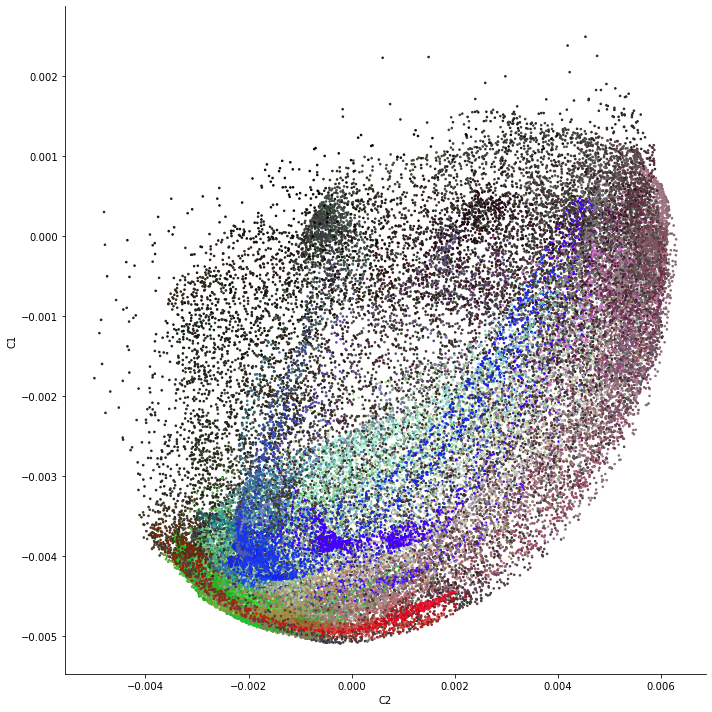

In [3]:
figsize = (10, 10)

# mask = Atlas('HCP-MMP').get_mask('LR', 'grayordinate')[0]
# pc_file = pjoin(anal_dir, 'decomposition/S1200-grp-RSFC-r_grayordinate2grayordinate_zscore_PCA-comp.dscalar.nii')

# mask = Atlas('HCP-MMP').get_mask('LR')[0]
# pc_file = pjoin(anal_dir, 'decomposition/RSFC_MMP-vis3-R2cortex_PCA-weight.dscalar.nii')

mask = Atlas('HCP-MMP').get_mask('LR', 'grayordinate')[0]
pc_file = pjoin(anal_dir, 'decomposition/HCPY-avg_RSFC-MMP-vis3-R2grayordinate_zscore_PCA-weight.dscalar.nii')

# target
trg_reader = CiftiReader(mmp_map_file)
out_file = pjoin(work_dir, 'PC1+2_predict_MMP.jpg')
# out_file = 'show'

pc_maps = nib.load(pc_file).get_fdata()[:2, mask]
trg_map = trg_reader.get_data()[0]
lbl_tab = trg_reader.label_tables()[0]
colors = [lbl_tab[i].rgba for i in trg_map]
colors = np.array(colors)

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(pc_maps[1], pc_maps[0], c=colors, s=2.5)
ax.set_xlabel('C2')
ax.set_ylabel('C1')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# 用stru-C1, gdistFromCS为轴，画出V1~4和MT，POS1的位置

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


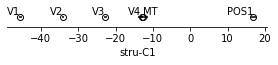

In [12]:
figsize = (4, 1)
data_flag = 'stru-C1'
if data_flag == 'stru-C1':
    fpath = pjoin(anal_dir, 'decomposition/HCPY-M+T_MMP-vis3-R_zscore1_PCA-subj.dscalar.nii')
    rois_flag = ['MT']
elif data_flag == 'gdistFromCS':
    fpath = pjoin(anal_dir, 'gdist/gdist_src-CalcarineSulcus.dscalar.nii')
    rois_flag = ['POS1', 'V3']
else:
    raise ValueError('not supported data_flag:', data_flag)
out_file = pjoin(work_dir, f'hierarchy-position-{data_flag}.jpg')

rois = ['R_V1', 'R_V2', 'R_V3', 'R_V4', 'R_MT', 'R_POS1']
atlas = Atlas('HCP-MMP')
n_roi = len(rois)
feat_map = nib.load(fpath).get_fdata()[0]

fig, ax = plt.subplots(figsize=figsize)
y = np.ones(n_roi)
x = np.zeros(n_roi)
x_err = np.zeros(n_roi)
for roi_idx, roi in enumerate(rois):
    mask = atlas.get_mask(roi)[0]
    feat_values = feat_map[mask]
    x[roi_idx] = np.mean(feat_values)
    x_err[roi_idx] = sem(feat_values)
ax.errorbar(x, y, xerr=x_err, ecolor='k', linestyle='',
            marker='o', mfc=(1, 1, 1, 0), mec='k')
for j, i, roi in zip(x, y, rois):
    roi = roi.lstrip('R_')
    if roi in rois_flag:
        ha, va = 'left', 'bottom'
    else:
        ha, va = 'right', 'bottom'
    ax.text(j, i, roi, horizontalalignment=ha, verticalalignment=va)
ax.set_xlabel(data_flag)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(left=False, labelleft=False)
fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)